# Algoritmos de Ford-Fulkerson y Edmonds-Karp

## Introducción

## Algoritmo de Ford-Fulkerson

## Algoritmo de Edmonds-Karp

In [174]:
import networkx as nx
import matplotlib.pyplot as plt

def EK(G,s,t):
    arrows=list(G.edges)
    vertices=list(G.nodes)
    
    flows={e:0 for e in arrows}
    capacities={e:G[e[0]][e[1]]['capacity'] for e in arrows}
    residue={e:capacities[e]-flows[e] for e in arrows}

    def BFS():
        to_process=[s]
        found={v: False for v in vertices}
        found[s]=True
        parents={}
        parents[s]=None

        while to_process:
            v=to_process[0]
            for w in G.neighbors(v):
                if residue[(v,w)]>0 and found[w]==False:
                    parents[w]=v
                    found[w]=True
                    if w==t:
                        path=[t]
                        pathedges=[]
                        while path[0]!=s:
                            path=[parents[path[0]]]+path
                            pathedges.append((path[0],path[1]))
                        return(pathedges)
                    to_process.append(w)
            to_process.remove(v)
        return None

    new_path=BFS()
    while new_path:
        min_res=min(residue[e] for e in new_path)
        for e in new_path:
            inv_e=(e[1],e[0])
            flows[e]+=min_res
            flows[inv_e]-=min_res
            residue[e]-=min_res
            residue[inv_e]+=min_res
        new_path=BFS()
        
    return flows

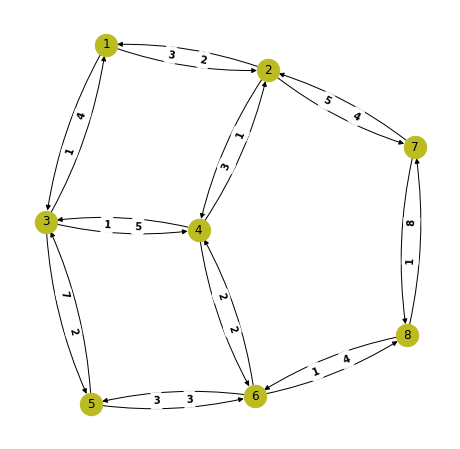

In [175]:
G=nx.DiGraph()
G.add_edges_from([
    (1,2,{"capacity":3}),(2,1,{"capacity":2}),
    (1,3,{"capacity":4}),(3,1,{"capacity":1}),
    (2,7,{"capacity":5}),(7,2,{"capacity":4}),
    (3,4,{"capacity":1}),(4,3,{"capacity":5}),
    (3,5,{"capacity":7}),(5,3,{"capacity":2}),
    (4,2,{"capacity":3}),(2,4,{"capacity":1}),
    (5,6,{"capacity":3}),(6,5,{"capacity":3}),
    (6,4,{"capacity":2}),(4,6,{"capacity":2}),
    (6,8,{"capacity":1}),(8,6,{"capacity":4}),
    (7,8,{"capacity":8}),(8,7,{"capacity":1})
])

fig, ax= plt.subplots(1)
fig.set_size_inches(8,8)

KKL=nx.kamada_kawai_layout(G)

labels = nx.get_edge_attributes(G,'capacity')
nx.draw(G,pos=KKL,with_labels=True, node_color='#bbbb22',node_size=500,connectionstyle='arc3, rad = 0.1')
nx.draw_networkx_edge_labels(G,KKL,edge_labels=labels, label_pos=0.6,font_weight="bold")

plt.show()

In [176]:
best_flow=EK(G,1,8)

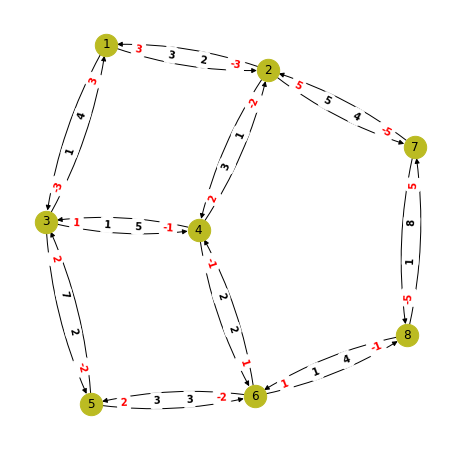

In [177]:
fig, ax= plt.subplots(1)
fig.set_size_inches(8,8)

nx.draw(G,pos=KKL,with_labels=True, node_color='#bbbb22',node_size=500,connectionstyle='arc3, rad = 0.1')
nx.draw_networkx_edge_labels(G,KKL,edge_labels=labels, label_pos=0.6, font_weight="bold")
nx.draw_networkx_edge_labels(G,KKL,edge_labels=best_flow, label_pos=0.8,font_color="red", font_weight="bold")

plt.show()

## Aplicación a emparejamientos bipartitos

*Ejemplo.* Terminemos la discusión con un ejemplo aplicado. Retomemos un ejemplo que trabajamos anteriormente acerca de Becarios Conacyt. Trabajamos con las becas al extranjero de 2018 y pusimos una arista de peso $w$ entre un área del conocimiento y un país si había $w$ becarios que estudiaron en esa área y ese país.

Supongamos que Conacyt decide que para cada área del conocimiento, Conacyt premiará al becario de mejor desempeño. Sólo quiere tomar en cuenta como candidatos a los que hayan ido a alguno de los países 'LUXEMBURGO', 'COREA', 'BOLIVIA', 'URUGUAY', 'JAPON', 'RUSIA', 'UCRANIA'. No quiere que se repitan países.

¿Será posible para Conacyt hacer esto? Si no, ¿cuál será el máximo número de premios que puede otorgar?

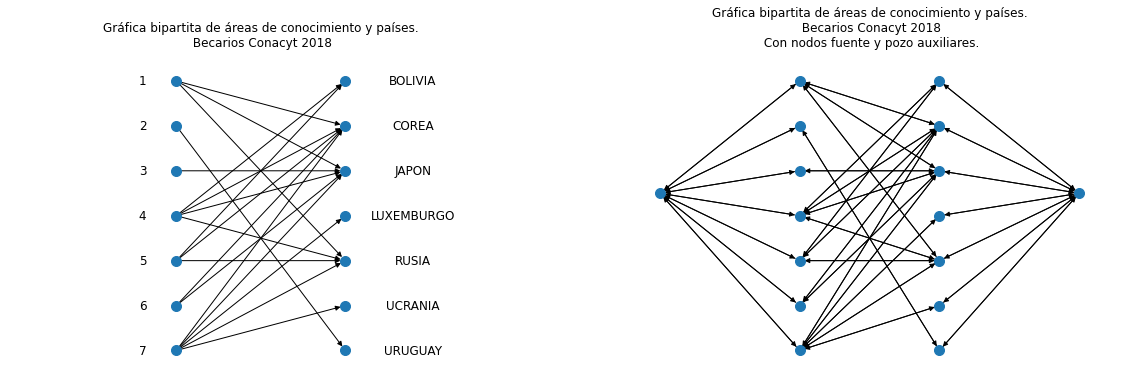

In [261]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("Becas_Extranjero_Ene_Dic_2018.csv")

areas=sorted(df['ÁREA DEL CONOCIMIENTO'].unique(),reverse=True)
rename_areas={area: 7-j for j, area in enumerate(areas)}
areas=[7,6,5,4,3,2,1]
df['ÁREA DEL CONOCIMIENTO']=df['ÁREA DEL CONOCIMIENTO'].apply(lambda x: rename_areas[x])
paises=sorted(['LUXEMBURGO', 'COREA', 'BOLIVIA', 'URUGUAY', 'JAPON', 'RUSIA', 'UCRANIA'],reverse=True)
df_filtro=df[df['PAÍS'].isin(paises)]

records=df_filtro.groupby(['ÁREA DEL CONOCIMIENTO', 'PAÍS']).count()['CONSEC.'].reset_index().to_records()
edges=[(record[1],record[2],{"capacity":1}) for record in records]

D=nx.DiGraph()
D.add_edges_from(edges)

# Hacemos el dibujo

fig, ax= plt.subplots(1,2)

layout={}
labels={}
for i, j in enumerate(areas):
    layout[j]=(0.5,i/7)
    labels[j]=(0.4,i/7)
for i, j in enumerate(paises):
    layout[j]=(1,i/7)
    labels[j]=(1.2,i/7)

ax[0].set_xlim(0,1.5)
ax[0].set_title("Gráfica bipartita de áreas de conocimiento y países.\n Becarios Conacyt 2018")

nx.draw(D,layout,ax=ax[0],node_size=100)
nx.draw_networkx_labels(D,labels,ax=ax[0],)

# Agregamos los vértices y flechas auxiliares.

D.add_edges_from([("X",area,{"capacity":1}) for area in areas])
D.add_edges_from([(pais,"Y",{"capacity":1}) for pais in paises])

D.add_edges_from([(e[1],e[0],{"capacity":0}) for e in D.edges])
D.add_edges_from([(area,"X",{"capacity":0}) for area in areas])
D.add_edges_from([("Y",pais,{"capacity":0}) for pais in paises])

# Hacemos el dibujo

layout['X']=(0,0.5)
layout['Y']=(1.5,0.5)

ax[1].set_title("Gráfica bipartita de áreas de conocimiento y países.\n Becarios Conacyt 2018\n Con nodos fuente y pozo auxiliares.")

fig.set_size_inches(20,6)

nx.draw(D,layout,ax=ax[1],node_size=100)

plt.show()

Agregaremos vértices $X$ y $Y$ auxiliares. Conectamos a $X$ hacia las áreas y los países hacia $Y$. Ponemos peso $1$ en estas flechas. Agregamos además todas las flechas simétricas, en donde ponemos como capacidad $0$.

In [263]:
# Calculamos la mejor asignación.
asignacion=EK(D,"X","Y")
positivos={x:asignacion[x] for x in asignacion if (x[0] in areas and x[1] in paises and asignacion[x]>0)}
print("Máximo se pueden dar {} premios. Una posible repartición es:".format(sum(positivos.values())))
for j in positivos:
    print("  - Premio en Área {} en el país {}.".format(j[0],j[1]))

Máximo se pueden dar 6 premios. Una posible repartición es:
  - Premio en Área 1 en el país COREA.
  - Premio en Área 2 en el país URUGUAY.
  - Premio en Área 4 en el país RUSIA.
  - Premio en Área 5 en el país BOLIVIA.
  - Premio en Área 6 en el país JAPON.
  - Premio en Área 7 en el país LUXEMBURGO.


## Matching máximo

In [105]:
# matching=nx.max_weight_matching(B)
# matching=[sorted(x,key=len) for x in matching]

# print("Para maximizar el número de becarios:")
# for edge in matching:
#     print("A {} deben ir {} becarios para estudiar {}.".format(edge[0],B[edge[0]][edge[1]]['weight'],edge[1]))

# print(sum([B[edge[0]][edge[1]]['weight'] for edge in matching]))

Para maximizar el número de becarios:
A ALEMANIA deben ir 59 becarios para estudiar I. FISICO MATEMATICAS Y CS. DE LA TIERRA.
A BRASIL deben ir 51 becarios para estudiar VI. BIOTECNOLOGIA Y CS. AGROPECUARIAS.
A FRANCIA deben ir 61 becarios para estudiar II. BIOLOGIA Y QUIMICA.
A ISRAEL deben ir 60 becarios para estudiar III. MEDICINA Y CS. DE LA SALUD.
A ESTADOS UNIDOS deben ir 498 becarios para estudiar V. CIENCIAS SOCIALES.
A ESPAÑA deben ir 84 becarios para estudiar IV. HUMANIDADES Y CS. DE LA CONDUCTA.
A REINO UNIDO deben ir 340 becarios para estudiar VII. INGENIERIAS.
1153


<span class="math" style="float:right">$\square$</span>

## Tarea moral

Los siguientes problemas te ayudarán a practicar lo visto en esta entrada. Para resolverlos, necesitarás usar herramientas matemáticas, computacionales o ambas.

1. Problema
2. Problema
3. Problema
4. Problema
5. Lee acerca del algoritmo húngaro 